# Explorando el dataset "tips"

Seaborn cuenta con varios datasets para explorar.

En este conjunto de datos hay información sobre propinas dejadas en un restaurante, con información sobre el día en el que se produjo, si fue en el almuerzo o la cena, el número de comensales, el sexo de la persona que dejó la propina, si era fumador o no.´

1. total_bill: cuenta total
2. tip: propina
3. sex: sexo de la persona
4. smoker: si la persona es fumadora o no
5. day: dia de la semana
6. time: tiempo donde se dejo la propina

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
df_tips = sns.load_dataset("tips")
display(df_tips.head(10))

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [3]:
df_tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [4]:
df_tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


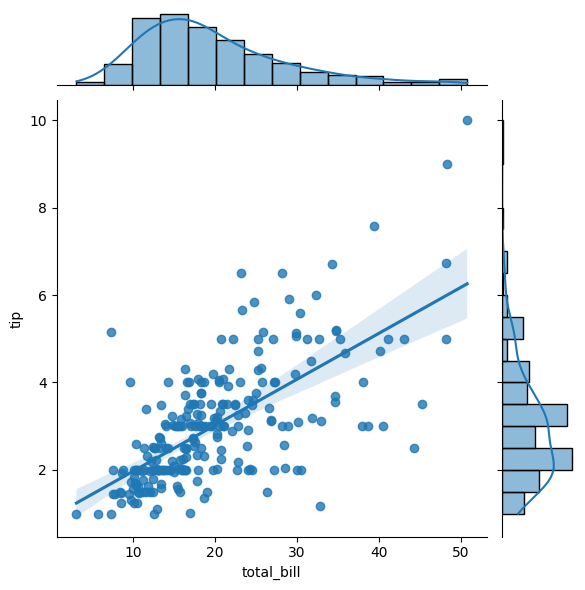

In [5]:
sns.jointplot(x=df_tips["total_bill"], y=df_tips["tip"],kind="reg")

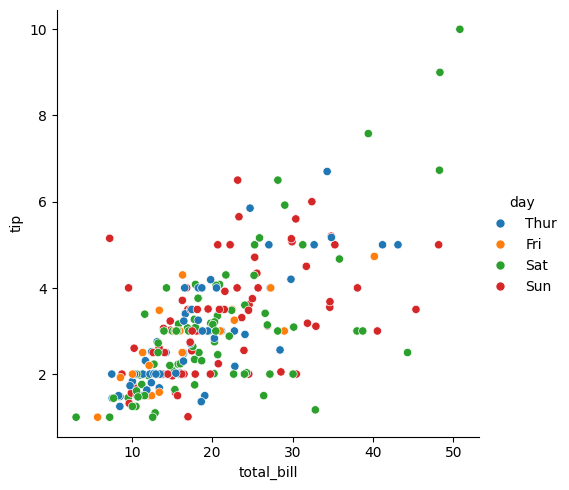

In [6]:
sns.relplot(data=df_tips, x="total_bill", y="tip", hue="day")

In [7]:
df_tips["time"].unique() # Tiempos de comida

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

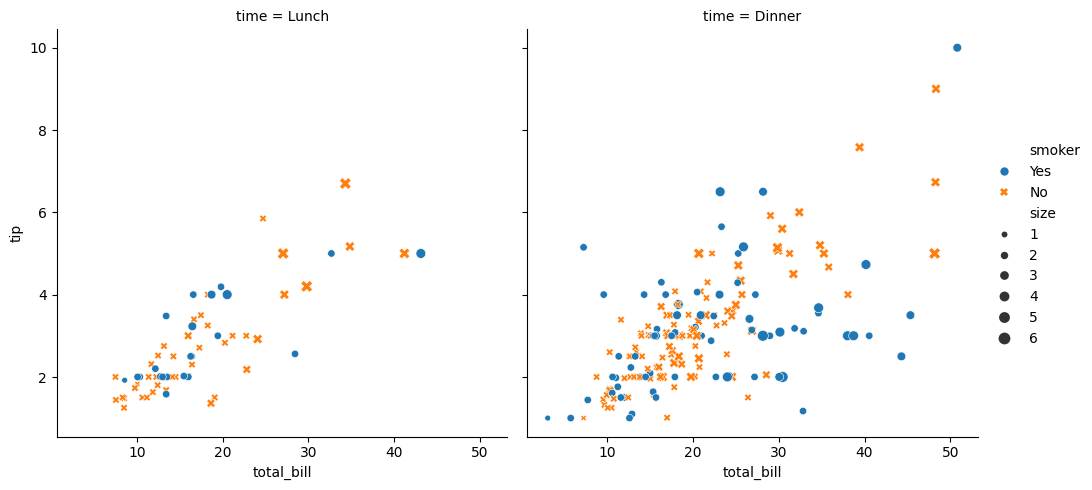

In [8]:
sns.relplot(data=df_tips,x="total_bill",y="tip",col="time",hue="smoker",style="smoker",size="size")

Calculemos ahora las cuentas totales por dia

In [11]:
df_tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [21]:
df_tips.groupby('day').agg(total_bill = ("total_bill",np.sum),  average_bill = ("total_bill",np.average), total_tip = ("tip",np.sum), average_tip = ("tip",np.average))

C:\Users\aleja\AppData\Local\Temp\ipykernel_14664\3721554998.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tips.groupby('day').agg(total_bill = ("total_bill",np.sum),  average_bill = ("total_bill",np.average), total_tip = ("tip",np.sum), average_tip = ("tip",np.average))
C:\Users\aleja\AppData\Local\Temp\ipykernel_14664\3721554998.py:1: FutureWarning: The provided callable <function sum at 0x0000020E7E764D60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_tips.groupby('day').agg(total_bill = ("total_bill",np.sum),  average_bill = ("total_bill",np.average), total_tip = ("tip",np.sum), average_tip = ("tip",np.average))


,total_bill,average_bill,total_tip,average_tip
day,,,,
Thur,1096.33,17.682742,171.83,2.771452
Fri,325.88,17.151579,51.96,2.734737
Sat,1778.40,20.441379,260.40,2.993103
Sun,1627.16,21.410000,247.39,3.255132


In [22]:
df_tips.groupby(["sex","day"]).agg(total_bill = ("total_bill",np.sum),  average_bill = ("total_bill",np.average), total_tip = ("tip",np.sum), average_tip = ("tip",np.average))

C:\Users\aleja\AppData\Local\Temp\ipykernel_14664\3518142827.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tips.groupby(["sex","day"]).agg(total_bill = ("total_bill",np.sum),  average_bill = ("total_bill",np.average), total_tip = ("tip",np.sum), average_tip = ("tip",np.average))
C:\Users\aleja\AppData\Local\Temp\ipykernel_14664\3518142827.py:1: FutureWarning: The provided callable <function sum at 0x0000020E7E764D60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_tips.groupby(["sex","day"]).agg(total_bill = ("total_bill",np.sum),  average_bill = ("total_bill",np.average), total_tip = ("tip",np.sum), average_tip = ("tip",np.average))


total_bill  average_bill  total_tip  average_tip
sex    day                                                   
Male   Thur      561.44     18.714667      89.41     2.980333
       Fri       198.57     19.857000      26.93     2.693000
       Sat      1227.35     20.802542     181.95     3.083898
       Sun      1269.46     21.887241     186.78     3.220345
Female Thur      534.89     16.715312      82.42     2.575625
       Fri       127.31     14.145556      25.03     2.781111
       Sat       551.05     19.680357      78.45     2.801786
       Sun       357.70     19.872222      60.61     3.367222

In [23]:
df_tips.groupby(["sex","smoker"]).agg(total_bill = ("total_bill",np.sum),  average_bill = ("total_bill",np.average), total_tip = ("tip",np.sum), average_tip = ("tip",np.average))

C:\Users\aleja\AppData\Local\Temp\ipykernel_14664\693404225.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_tips.groupby(["sex","smoker"]).agg(total_bill = ("total_bill",np.sum),  average_bill = ("total_bill",np.average), total_tip = ("tip",np.sum), average_tip = ("tip",np.average))
C:\Users\aleja\AppData\Local\Temp\ipykernel_14664\693404225.py:1: FutureWarning: The provided callable <function sum at 0x0000020E7E764D60> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  df_tips.groupby(["sex","smoker"]).agg(total_bill = ("total_bill",np.sum),  average_bill = ("total_bill",np.average), total_tip = ("tip",np.sum), average_tip = ("tip",np.average))


total_bill  average_bill  total_tip  average_tip
sex    smoker                                                  
Male   Yes        1337.07     22.284500     183.07     3.051167
       No         1919.75     19.791237     302.00     3.113402
Female Yes         593.27     17.977879      96.74     2.931515
       No          977.68     18.105185     149.77     2.773519